In [1]:
# Taken from http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort('al', inplace=True)
glass.head()

/Users/rashedkarim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

/Users/rashedkarim/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


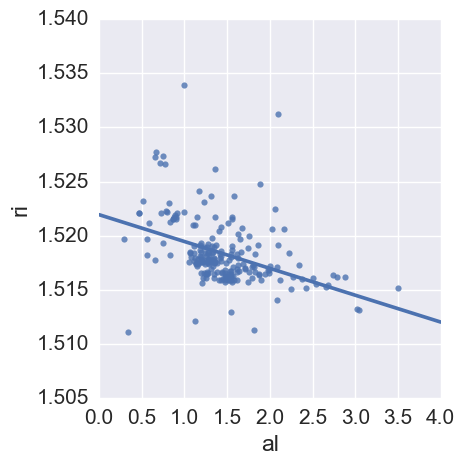

In [3]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

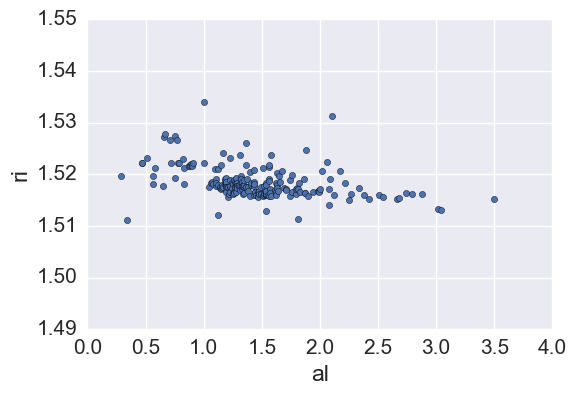

In [4]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

In [5]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


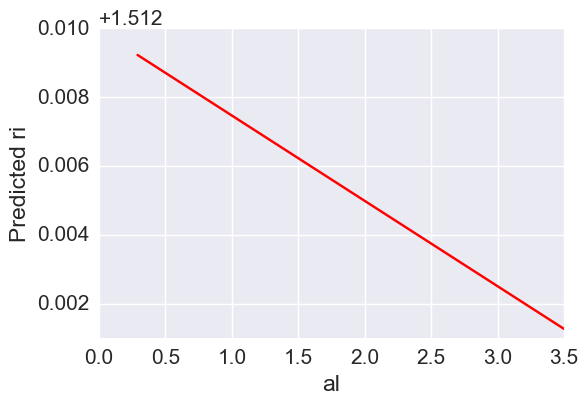

In [7]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

In [8]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [9]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


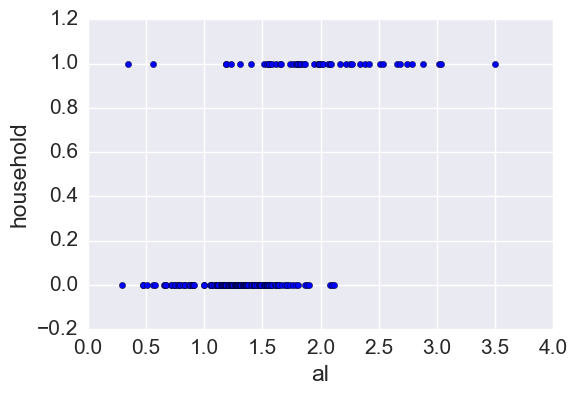

In [10]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [11]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

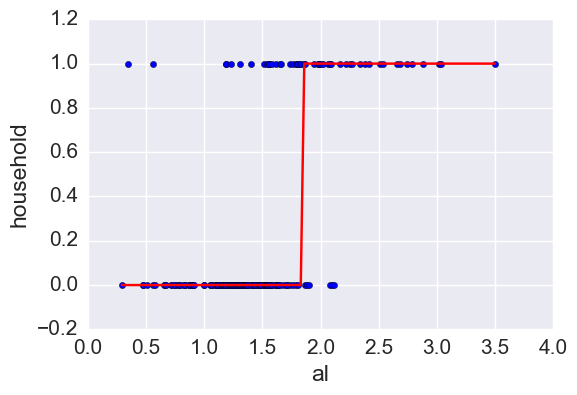

In [12]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')